In [1]:
import numpy as np 
import pandas as pd 
from colorama import Fore

In [2]:
import os
for dirname, _, filenames in os.walk('segmented-peripheral-blood-cells-using-opencv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

segmented-peripheral-blood-cells-using-opencv\binary_masks\binary_masks\basophil\BA_102039.jpg
segmented-peripheral-blood-cells-using-opencv\binary_masks\binary_masks\basophil\BA_107876.jpg
segmented-peripheral-blood-cells-using-opencv\binary_masks\binary_masks\basophil\BA_128084.jpg
segmented-peripheral-blood-cells-using-opencv\binary_masks\binary_masks\basophil\BA_129537.jpg
segmented-peripheral-blood-cells-using-opencv\binary_masks\binary_masks\basophil\BA_147402.jpg
segmented-peripheral-blood-cells-using-opencv\binary_masks\binary_masks\basophil\BA_157951.jpg
segmented-peripheral-blood-cells-using-opencv\binary_masks\binary_masks\basophil\BA_162483.jpg
segmented-peripheral-blood-cells-using-opencv\binary_masks\binary_masks\basophil\BA_166406.jpg
segmented-peripheral-blood-cells-using-opencv\binary_masks\binary_masks\basophil\BA_168566.jpg
segmented-peripheral-blood-cells-using-opencv\binary_masks\binary_masks\basophil\BA_173620.jpg
segmented-peripheral-blood-cells-using-opencv\bina

In [3]:
base_path = "segmented-peripheral-blood-cells-using-opencv/original_images/original_images"

In [4]:
cell_types = [
    "basophil", "eosinophil", "erythroblast", 
    "lymphocyte", "ig", "monocyte", 
    "neutrophil", "platelet"
]

In [5]:
data = []

for cell_type in cell_types:
    folder_path = os.path.join(base_path, cell_type)
    if os.path.exists(folder_path):  
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if os.path.isfile(file_path):  
                data.append({"Image_Path": file_path, "Label": cell_type})

In [6]:
df = pd.DataFrame(data)

In [7]:
df.head()

Image_Path     Label
0  segmented-peripheral-blood-cells-using-opencv/...  basophil
1  segmented-peripheral-blood-cells-using-opencv/...  basophil
2  segmented-peripheral-blood-cells-using-opencv/...  basophil
3  segmented-peripheral-blood-cells-using-opencv/...  basophil
4  segmented-peripheral-blood-cells-using-opencv/...  basophil

In [8]:
df.tail()

Image_Path     Label
1555  segmented-peripheral-blood-cells-using-opencv/...  platelet
1556  segmented-peripheral-blood-cells-using-opencv/...  platelet
1557  segmented-peripheral-blood-cells-using-opencv/...  platelet
1558  segmented-peripheral-blood-cells-using-opencv/...  platelet
1559  segmented-peripheral-blood-cells-using-opencv/...  platelet

In [9]:
df.shape

(1560, 2)

In [10]:
df.columns

Index(['Image_Path', 'Label'], dtype='object')

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Image_Path    0
Label         0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  1560 non-null   object
 1   Label       1560 non-null   object
dtypes: object(2)
memory usage: 24.5+ KB


In [14]:
df.nunique()

Image_Path    1560
Label            8
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_8788\2944393323.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Label", order=df['Label'].value_counts().index, palette="viridis")


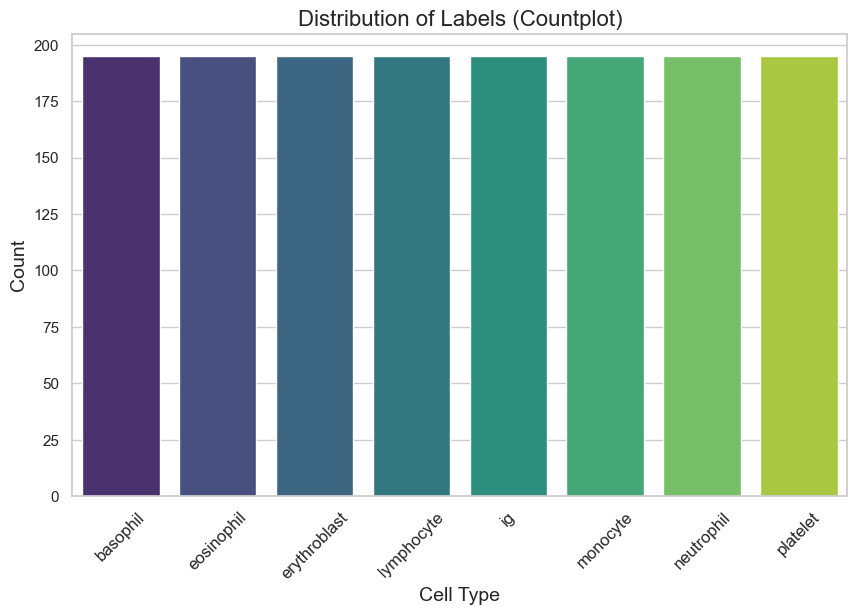

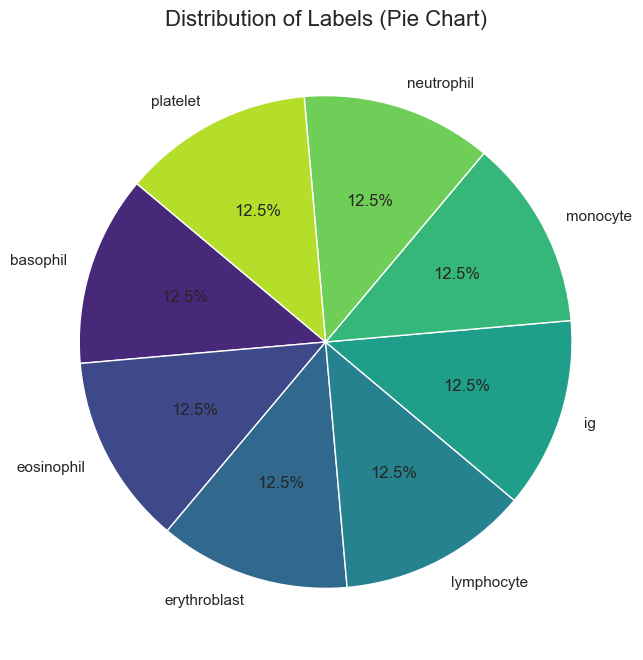

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Label", order=df['Label'].value_counts().index, palette="viridis")
plt.title("Distribution of Labels (Countplot)", fontsize=16)
plt.xlabel("Cell Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

plt.figure(figsize=(8, 8))
df['Label'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(df['Label'].unique()))
)
plt.title("Distribution of Labels (Pie Chart)", fontsize=16)
plt.ylabel("")  
plt.show()

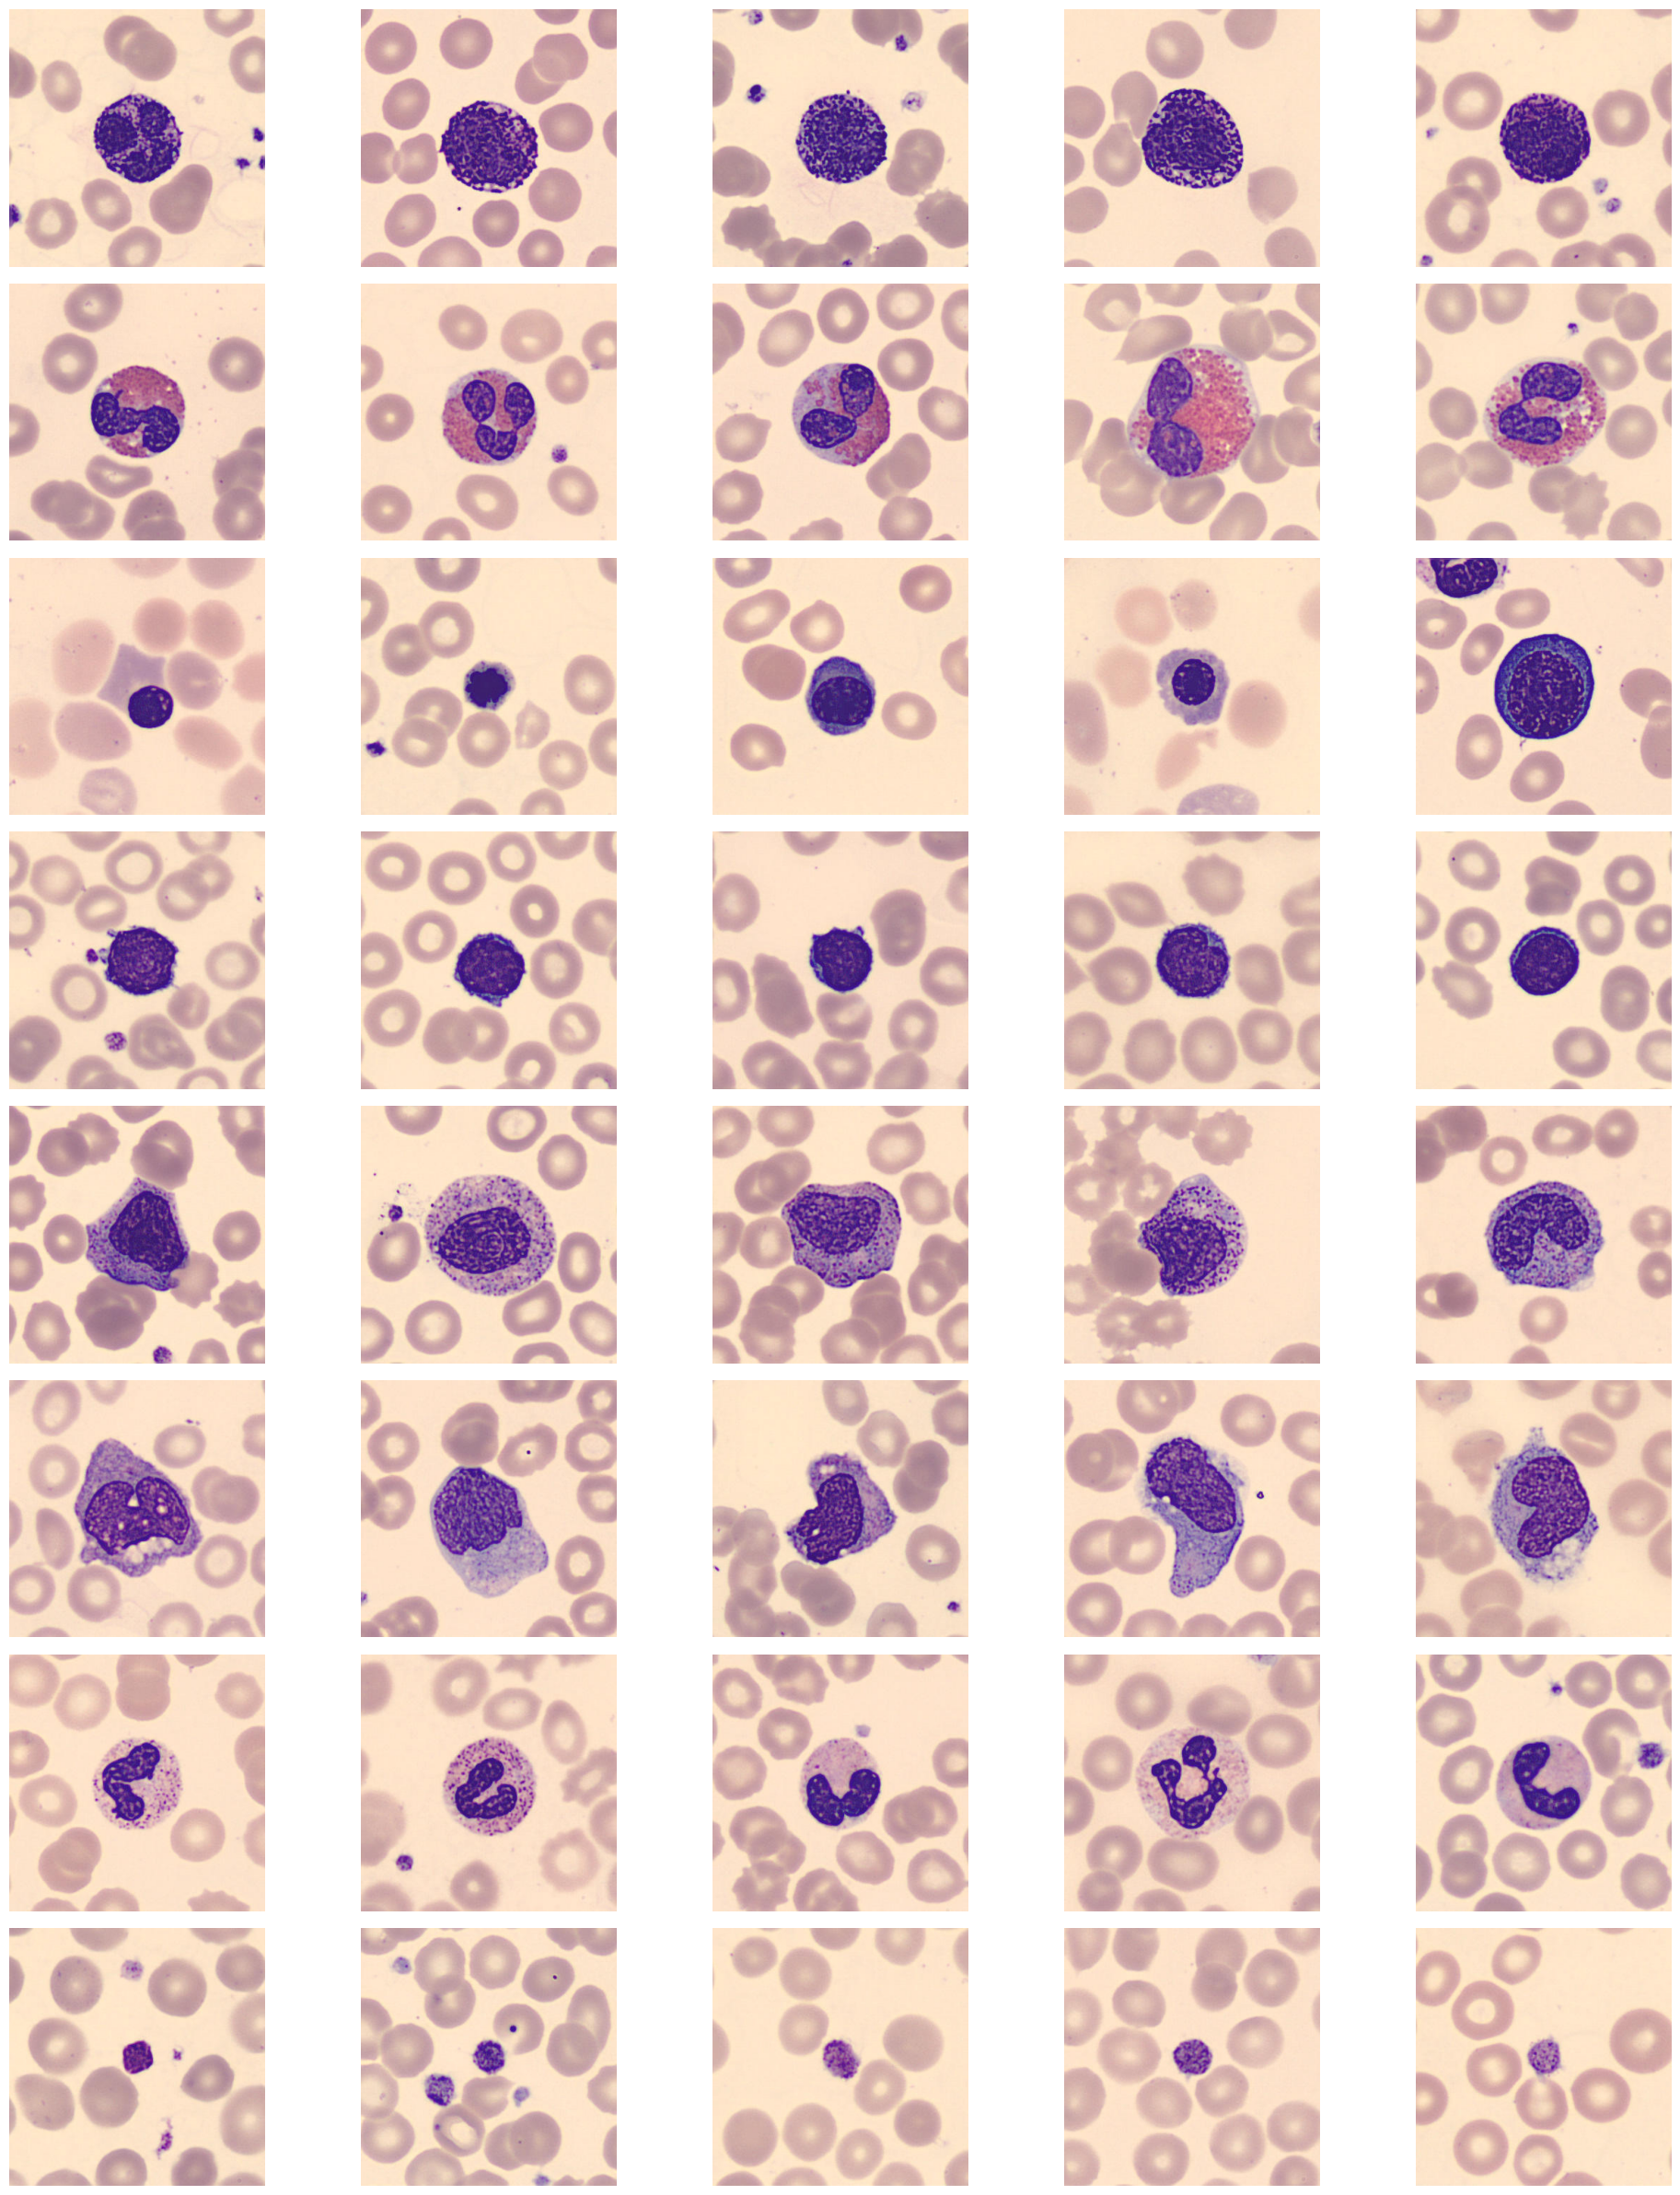

In [16]:
import cv2

samples_per_category = 5

plt.figure(figsize=(20, len(df['Label'].unique()) * 3))

for idx, label in enumerate(df['Label'].unique()):
    sample_images = df[df['Label'] == label].sample(n=samples_per_category, random_state=42)
    
    for i, img_path in enumerate(sample_images['Image_Path']):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        
        plt.subplot(len(df['Label'].unique()), samples_per_category, idx * samples_per_category + i + 1)
        plt.imshow(img)
        plt.axis('off') 
        if i == 0: 
            plt.ylabel(label, fontsize=14)

plt.tight_layout()
plt.show()

In [17]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('Check...........')

Check...........


In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'basophil': 0, 'eosinophil': 1, 'erythroblast': 2, 'ig': 3, 'lymphocyte': 4, 'monocyte': 5, 'neutrophil': 6, 'platelet': 7}


In [19]:
df['Label'] = df['Label'].astype(str)

In [20]:
train_df_new, temp_df_new = train_test_split(
    df,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df['Label']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['Label'] 
)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (299, 299)  
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    df,
    x_col='Image_Path',
    y_col='Label',
    target_size=img_size,  
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='Image_Path',  
    y_col='Label',     
    target_size=img_size,  
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='Image_Path', 
    y_col='Label',    
    target_size=img_size,  
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 1560 validated image filenames belonging to 8 classes.
Found 156 validated image filenames belonging to 8 classes.
Found 156 validated image filenames belonging to 8 classes.


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [25]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    GlobalAveragePooling2D, Dense, Dropout, 
    BatchNormalization, GaussianNoise, Input, 
    MultiHeadAttention, Reshape
)
from tensorflow.keras.optimizers import Adam

def create_xception_model(input_shape, num_classes=8, learning_rate=0.0001):
    inputs = Input(shape=input_shape, name="Input_Layer")
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    base_model.trainable = False
    x = base_model.output
    height, width, channels = x.shape[1], x.shape[2], x.shape[3]
    x = Reshape((height * width, channels), name="Reshape_to_Sequence")(x)
    attention_output = MultiHeadAttention(
        num_heads=8, key_dim=channels, name="Multi_Head_Attention"
    )(x, x)
    attention_output = Reshape((height, width, channels), name="Reshape_to_Spatial")(attention_output)
    x = GaussianNoise(0.25, name="Gaussian_Noise_1")(attention_output)
    x = GlobalAveragePooling2D(name="Global_Avg_Pooling")(x)
    x = Dense(512, activation='relu', name="FC_512")(x)
    x = BatchNormalization(name="Batch_Normalization")(x)
    x = GaussianNoise(0.25, name="Gaussian_Noise_2")(x)
    x = Dropout(0.25, name="Dropout")(x)
    outputs = Dense(num_classes, activation='softmax', name="Output_Layer")(x)
    model = Model(inputs=inputs, outputs=outputs, name="Xception_with_Attention")
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

input_shape = (299, 299, 3)
cnn_model = create_xception_model(input_shape, num_classes=8, learning_rate=0.0001)

In [26]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 542s 5s/step - accuracy: 0.5579 - loss: 1.3455 - val_accuracy: 0.4872 - val_loss: 1.8976
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 509s 5s/step - accuracy: 0.8240 - loss: 0.5022 - val_accuracy: 0.8718 - val_loss: 0.2979
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 523s 5s/step - accuracy: 0.8913 - loss: 0.3388 - val_accuracy: 0.7179 - val_loss: 1.0580
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 523s 5s/step - accuracy: 0.9290 - loss: 0.2357 - val_accuracy: 0.7372 - val_loss: 0.8200
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 615s 6s/step - accuracy: 0.9343 - loss: 0.1877 - val_accuracy: 0.8269 - val_loss: 0.5261


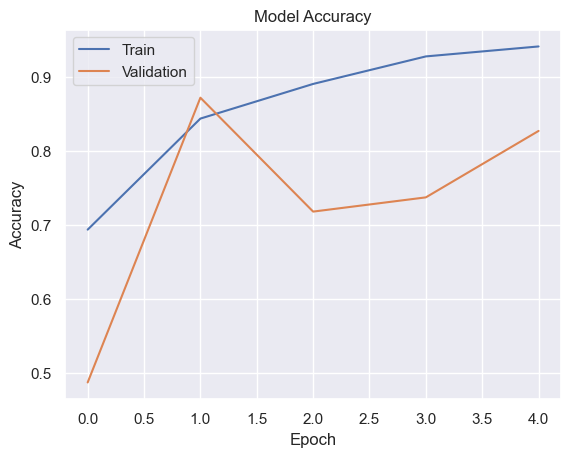

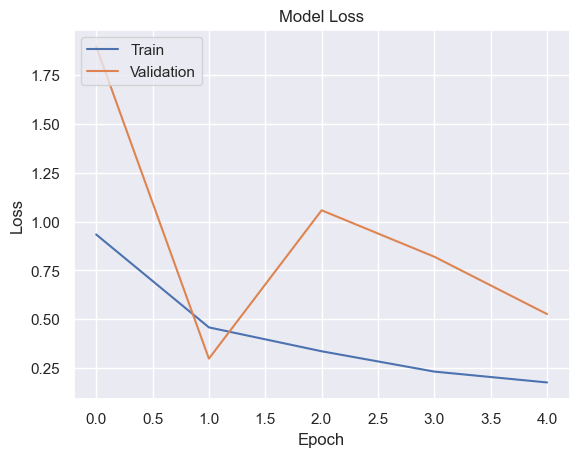

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step


In [29]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print("Xception Model =>")
print(Fore.GREEN +report)

Xception Model =>
              precision    recall  f1-score   support

    basophil       1.00      0.47      0.64        19
  eosinophil       1.00      0.84      0.91        19
erythroblast       0.79      0.95      0.86        20
          ig       0.52      0.85      0.64        20
  lymphocyte       1.00      0.95      0.97        20
    monocyte       0.91      0.53      0.67        19
  neutrophil       0.77      1.00      0.87        20
    platelet       1.00      0.95      0.97        19

    accuracy                           0.82       156
   macro avg       0.87      0.82      0.82       156
weighted avg       0.87      0.82      0.82       156



In [30]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

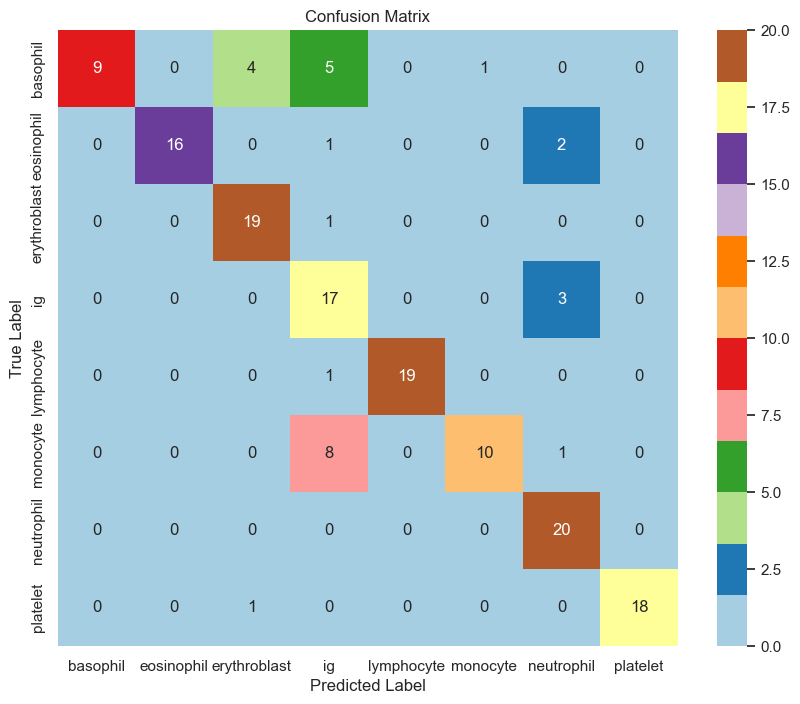

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Paired', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [32]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    GlobalAveragePooling2D, Dense, Dropout, 
    BatchNormalization, GaussianNoise, Input, 
    MultiHeadAttention, Reshape
)
from tensorflow.keras.optimizers import Adam

def create_mobilenet_model(input_shape, num_classes=8, learning_rate=0.0001):
    inputs = Input(shape=input_shape, name="Input_Layer")
    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)
    base_model.trainable = False
    x = base_model.output
    height, width, channels = x.shape[1], x.shape[2], x.shape[3]
    x = Reshape((height * width, channels), name="Reshape_to_Sequence")(x)
    attention_output = MultiHeadAttention(
        num_heads=8, key_dim=channels, name="Multi_Head_Attention"
    )(x, x)
    attention_output = Reshape((height, width, channels), name="Reshape_to_Spatial")(attention_output)
    x = GaussianNoise(0.25, name="Gaussian_Noise_1")(attention_output)
    x = GlobalAveragePooling2D(name="Global_Avg_Pooling")(x)
    x = Dense(512, activation='relu', name="FC_512")(x)
    x = BatchNormalization(name="Batch_Normalization")(x)
    x = GaussianNoise(0.25, name="Gaussian_Noise_2")(x)
    x = Dropout(0.25, name="Dropout")(x)
    outputs = Dense(num_classes, activation='softmax', name="Output_Layer")(x)
    model = Model(inputs=inputs, outputs=outputs, name="MobileNet_with_Attention")
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

input_shape = (299, 299, 3)
cnn_model = create_mobilenet_model(input_shape, num_classes=8, learning_rate=0.0001)

In [33]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.6222 - loss: 1.0812 - val_accuracy: 0.8846 - val_loss: 0.3594
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9166 - loss: 0.2390 - val_accuracy: 0.9423 - val_loss: 0.2167
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.9468 - loss: 0.1471 - val_accuracy: 0.9872 - val_loss: 0.0513
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9776 - loss: 0.0752 - val_accuracy: 1.0000 - val_loss: 0.0185
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9845 - loss: 0.0541 - val_accuracy: 0.9679 - val_loss: 0.0873


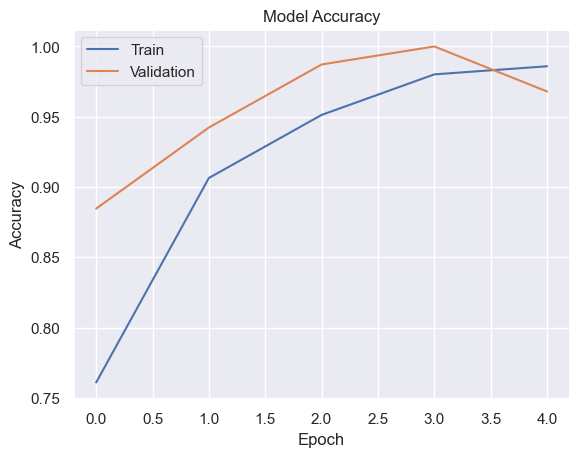

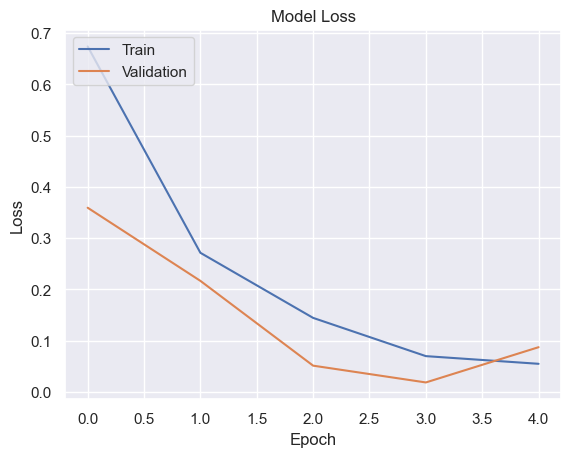

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 542ms/step


In [36]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print("MobileNet Model =>")
print(Fore.CYAN + report)

MobileNet Model =>
              precision    recall  f1-score   support

    basophil       1.00      0.89      0.94        19
  eosinophil       1.00      1.00      1.00        19
erythroblast       1.00      0.95      0.97        20
          ig       0.95      1.00      0.98        20
  lymphocyte       0.95      1.00      0.98        20
    monocyte       0.95      1.00      0.97        19
  neutrophil       1.00      1.00      1.00        20
    platelet       1.00      1.00      1.00        19

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



In [37]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

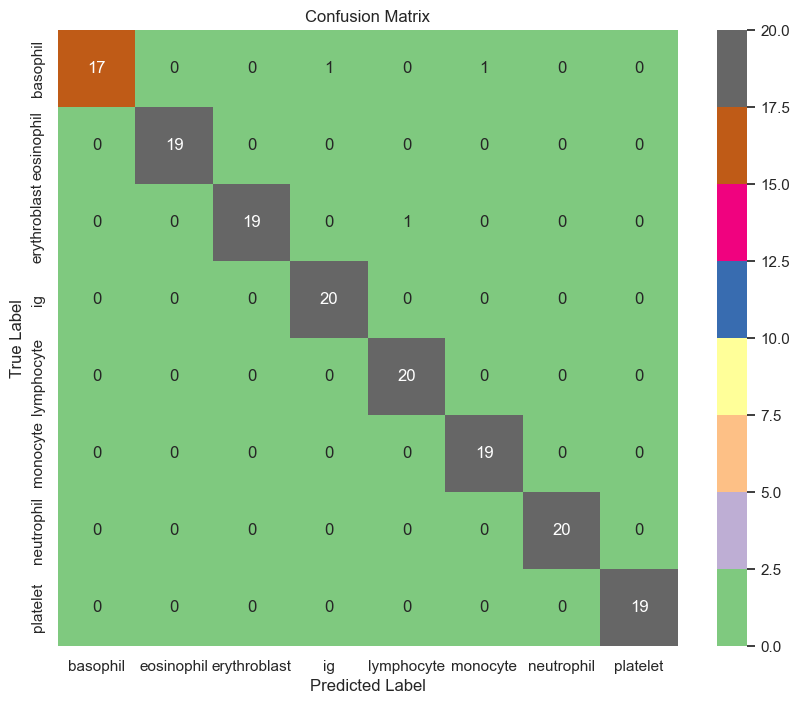

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Accent', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

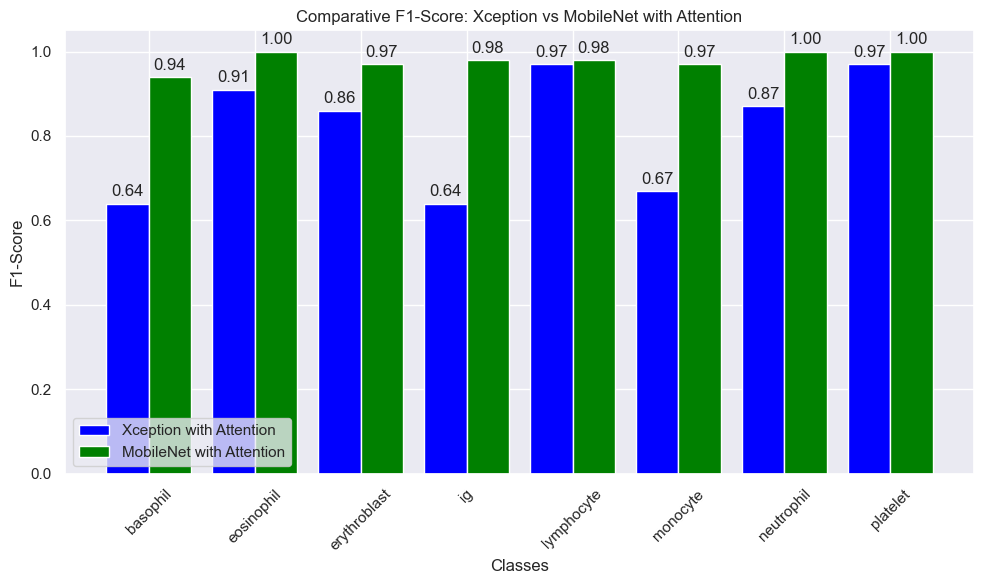

In [40]:
labels = ['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']

xception_f1_scores = [0.64, 0.91, 0.86, 0.64, 0.97, 0.67, 0.87, 0.97]
mobilenet_f1_scores = [0.94, 1.00, 0.97, 0.98, 0.98, 0.97, 1.00, 1.00]

x = np.arange(len(labels))

plt.figure(figsize=(10, 6))

plt.bar(x - 0.2, xception_f1_scores, 0.4, label='Xception with Attention', color='blue')
plt.bar(x + 0.2, mobilenet_f1_scores, 0.4, label='MobileNet with Attention', color='green')

plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('Comparative F1-Score: Xception vs MobileNet with Attention')
plt.xticks(x, labels, rotation=45)
plt.legend()

for i in range(len(x)):
    plt.text(x[i] - 0.2, xception_f1_scores[i] + 0.01, f'{xception_f1_scores[i]:.2f}', ha='center', va='bottom')
    plt.text(x[i] + 0.2, mobilenet_f1_scores[i] + 0.01, f'{mobilenet_f1_scores[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()